## Assignment 1

### Problem 1

In [40]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


In [41]:
## (c)
# simulate BM path
N1 = 3650
zt1 = np.cumsum(np.random.normal(size=N1-1) * np.sqrt(1/N1))
zt1 = np.insert(zt1,0,0)

# geometric BM function
def gbm(t, wt, mu, sigma, s0=1):
    return s0 * np.exp( sigma*wt + (mu - 1/2*sigma**2)*t )

# simulate geometric BM path
mu = 0.06
sigma = 0.2
times1 = [0+i*(1/N1) for i in range(1,N1+1)]
times1.insert(0,0)
st1 = [gbm(times1[t], zt1[t], mu, sigma) for t in range(N1)]


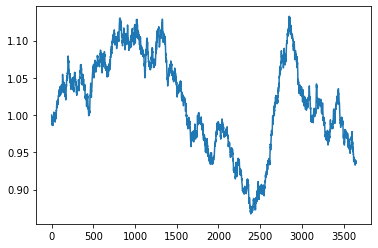

In [42]:
## (d) plot the daily share prices
plt.plot(st1)


In [43]:
## (e) daily continuously compounded returns
rt1 = np.diff(np.log(st1))


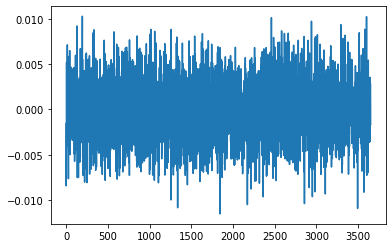

In [44]:
## (f)
plt.plot(rt1)


In [45]:
## (g)
rt1_ymean = 365*np.mean(rt1)
rt1_ystdv = np.sqrt(365)*np.std(rt1)
print("annualized mean of daily log-returns: ", rt1_ymean, "\nannualized standard deviation of daily log-returns: ", rt1_ystdv)


annualized mean of daily log-returns:  -0.006441386494050116 
annualized standard deviation of daily log-returns:  0.062017159270417774


### Problem 2


The sample has 25933 observations.


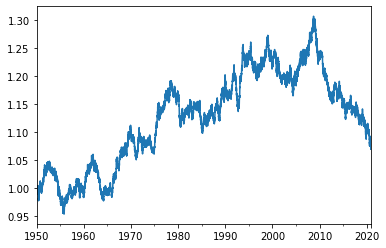

In [46]:
## (b) & (c)
idx = pd.period_range('1950-01-01','2020-12-31',freq='D')
N2 = len(idx)
zt2 = np.cumsum(np.random.normal(size=N2-1) * np.sqrt(1/N2))
zt2 = np.insert(zt2,0,0)
times2 = [0+i*(1/N2) for i in range(1,N2+1)]
times2.insert(0,0)
st2 = [gbm(times2[t], zt2[t], mu, sigma) for t in range(N2)]
st2 = pd.Series(st2,index=idx)
st2.plot()
print('The sample has',N2,'observations.')


In [101]:
st2
type(st2)

pandas.core.series.Series

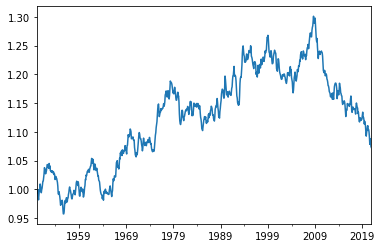

In [47]:
## (d) & (e)
st2_monavg = st2.resample(rule='M').mean()
st2_monavg.plot()


### Problem 3

In [48]:
## (a)
# daily
logr_d = st2.apply(math.log).diff()

# weekly
st2_w = st2.resample('W').first()
logr_w = st2_w.apply(math.log).diff()

# monthly
st2_m = st2.resample('M').first()
logr_m = st2_m.apply(math.log).diff()

In [49]:
## (b)
print('Daily log returns summary statistics:', logr_d.describe(), sep='\n')
print('Weekly log returns summary statistics:', logr_w.describe(), sep='\n')
print('Monthly log returns summary statistics:', logr_m.describe(), sep='\n')


Daily log returns summary statistics:
count    2.593200e+04
mean     2.857841e-06
std      1.240602e-03
min     -5.496201e-03
25%     -8.312482e-04
50%      2.068333e-07
75%      8.294665e-04
max      5.009963e-03
dtype: float64
Weekly log returns summary statistics:
count    3705.000000
mean        0.000020
std         0.003218
min        -0.012076
25%        -0.002189
50%        -0.000034
75%         0.002156
max         0.011709
dtype: float64
Monthly log returns summary statistics:
count    851.000000
mean       0.000080
std        0.006871
min       -0.019438
25%       -0.004768
50%        0.000141
75%        0.004417
max        0.025171
dtype: float64


In [50]:
## (c)
# daily
logr_d_ymean = 365*np.mean(logr_d)
logr_d_ystdv = np.sqrt(365)*np.std(logr_d)
print("annualized mean of daily log-returns: ", logr_d_ymean, "\nannualized standard deviation of daily log-returns: ", logr_d_ystdv)

# weekly
logr_w_ymean = 365/7*np.mean(logr_w)
logr_w_ystdv = np.sqrt(365/7)*np.std(logr_w)
print("annualized mean of weekly log-returns: ", logr_w_ymean, "\nannualized standard deviation of weekly log-returns: ", logr_w_ystdv)

# monthly
logr_m_ymean = 12*np.mean(logr_m)
logr_m_ystdv = np.sqrt(12)*np.std(logr_m)
print("annualized mean of monthly log-returns: ", logr_m_ymean, "\nannualized standard deviation of monthly log-returns: ", logr_m_ystdv)


annualized mean of daily log-returns:  0.001043111818367618 
annualized standard deviation of daily log-returns:  0.023701217596188526
annualized mean of weekly log-returns:  0.001025175437972702 
annualized standard deviation of weekly log-returns:  0.023236906978331317
annualized mean of monthly log-returns:  0.0009613554800975506 
annualized standard deviation of monthly log-returns:  0.02378818430411127


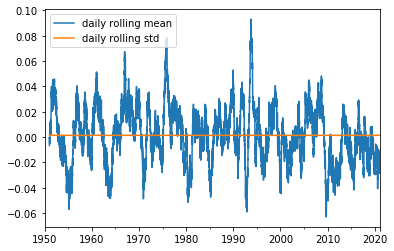

In [51]:
## (d)
# daily
logr_d_mean = logr_d.rolling(365).sum()
logr_d_std = logr_d.rolling(365).std()

logr_d_mean.plot()
logr_d_std.plot()
plt.legend(['daily rolling mean', 'daily rolling std'])


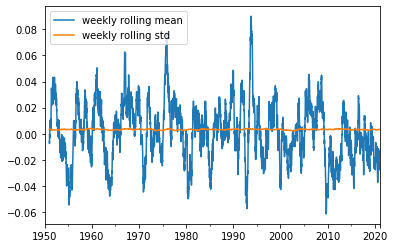

In [52]:
# weekly
logr_w_mean = logr_w.rolling(52).sum()
logr_w_std = logr_w.rolling(52).std()

logr_w_mean.plot()
logr_w_std.plot()
plt.legend(['weekly rolling mean', 'weekly rolling std'])



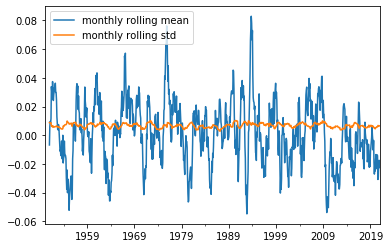

In [53]:
# monthly
logr_m_mean = logr_m.rolling(12).sum()
logr_m_std = logr_m.rolling(12).std()

logr_m_mean.plot()
logr_m_std.plot()
plt.legend(['monthly rolling mean', 'monthly rolling std'])


In [54]:
## (e)
print("annualized mean of daily log-returns: ", logr_d_mean.describe(), "\n")
print("annualized mean of weekly log-returns: ", logr_w_mean.describe(), "\n")
print("annualized mean of monthly log-returns: ", logr_m_mean.describe(), "\n")
print("annualized standard deviation of daily log-returns: ", logr_d_std.describe(),"\n")
print("annualized standard deviation of weekly log-returns: ", logr_w_std.describe(),"\n")
print("annualized standard deviation of monthly log-returns: ", logr_m_std.describe(),"\n")


annualized mean of daily log-returns:  count    25568.000000
mean         0.001326
std          0.022276
min         -0.063174
25%         -0.013721
50%          0.001188
75%          0.016695
max          0.092887
dtype: float64 

annualized mean of weekly log-returns:  count    3654.000000
mean        0.001315
std         0.022232
min        -0.061554
25%        -0.013481
50%         0.001154
75%         0.016572
max         0.090115
dtype: float64 

annualized mean of monthly log-returns:  count    840.000000
mean       0.001334
std        0.022242
min       -0.054885
25%       -0.014203
50%        0.001320
75%        0.016774
max        0.082964
dtype: float64 

annualized standard deviation of daily log-returns:  count    25568.000000
mean         0.001239
std          0.000046
min          0.001115
25%          0.001207
50%          0.001237
75%          0.001273
max          0.001389
dtype: float64 

annualized standard deviation of weekly log-returns:  count    3654.000000
mean

#### from the above summary statistics, we can see the variation in the annualized mean and standard deviation. For the annualized mean, with all frequencies, they are almost the same, with the weekly one slightly smaller than the other two. For the annualized standard deviation, the variation is hugely different, with the daily one the smallest.


In [55]:
##(f)

### Problem 4

In [14]:
# pip install wrds

Note: you may need to restart the kernel to use updated packages.


In [6]:
# pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [56]:
import wrds

In [58]:
db = wrds.Connection(wrds_username='alina925')
db.create_pgpass_file()

Loading library list...
Done
Enter your WRDS username [felicity]:alina925
Enter your password:········


In [ ]:
## (c) get data for each company
aapl=db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date>='2001-01-01' and date<='2020-12-31'")
aapl.to_csv('aapl.csv')

gs=db.raw_sql("select date, ret from crsp.dsf where permco in (35048) and date>='2001-01-01' and date<='2020-12-31'")
gs.to_csv('gs.csv')

msft=db.raw_sql("select date, ret from crsp.dsf where permco in (8048) and date>='2001-01-01' and date<='2020-12-31'")
msft.to_csv('msft.csv')

pg=db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date>='2001-01-01' and date<='2020-12-31'")
pg.to_csv('pg.csv')

ge=db.raw_sql("select date, ret from crsp.dsf where permco in (20792) and date>='2001-01-01' and date<='2020-12-31'")
ge.to_csv('ge.csv')


In [59]:
## (d) read files
aapl = pd.read_csv('aapl.csv')
gs = pd.read_csv('gs.csv')
msft = pd.read_csv('msft.csv')
pg = pd.read_csv('pg.csv')
ge = pd.read_csv('ge.csv')


In [29]:
## (e)
# repeat (a) log returns

### AAPL
# daily
aaplr_d = np.log(aapl.ret).diff()
# aaplr_d = aapl.apply(math.log).diff()
# weekly
temp_w = aapl.resample('W').first()
aaplr_w = temp_w.apply(math.log).diff()
# monthly
temp_m = aapl.resample('M').first()
aaplr_m = temp_m.apply(math.log).diff()


### GS
# daily
gsr_d = gs.apply(math.log).diff()
# weekly
temp_w = gs.resample('W').first()
gsr_w = temp_w.apply(math.log).diff()
# monthly
temp_m = gs.resample('M').first()
gsr_m = temp_m.apply(math.log).diff()

### MSFT
# daily
msftr_d = msft.apply(math.log).diff()
# weekly
temp_w = msft.resample('W').first()
msftr_w = temp_w.apply(math.log).diff()
# monthly
temp_m = msft.resample('M').first()
msftr_m = temp_m.apply(math.log).diff()

### PG
# daily
pgr_d = pg.apply(math.log).diff()
# weekly
temp_w = pg.resample('W').first()
pgr_w = temp_w.apply(math.log).diff()
# monthly
temp_m = pg.resample('M').first()
pgr_m = temp_m.apply(math.log).diff()

### GE
# daily
ger_d = ge.apply(math.log).diff()
# weekly
temp_w = ge.resample('W').first()
ger_w = temp_w.apply(math.log).diff()
# monthly
temp_m = ge.resample('M').first()
ger_m = temp_m.apply(math.log).diff()

TypeError: cannot convert the series to <class 'float'>

In [ ]:
# repeat (b) summary statistics

### AAPL
print('Daily log returns summary statistics:', aaplr_d.describe(), sep='\n')
print('Weekly log returns summary statistics:', aaplr_w.describe(), sep='\n')
print('Monthly log returns summary statistics:', aaplr_m.describe(), sep='\n')

### GS
print('Daily log returns summary statistics:', gsr_d.describe(), sep='\n')
print('Weekly log returns summary statistics:', gsr_w.describe(), sep='\n')
print('Monthly log returns summary statistics:', gsr_m.describe(), sep='\n')

### MSFT
print('Daily log returns summary statistics:', msftr_d.describe(), sep='\n')
print('Weekly log returns summary statistics:', msftr_w.describe(), sep='\n')
print('Monthly log returns summary statistics:', msftr_m.describe(), sep='\n')

### PG
print('Daily log returns summary statistics:', pgr_d.describe(), sep='\n')
print('Weekly log returns summary statistics:', pgr_w.describe(), sep='\n')
print('Monthly log returns summary statistics:', pgr_m.describe(), sep='\n')

### GE
print('Daily log returns summary statistics:', ger_d.describe(), sep='\n')
print('Weekly log returns summary statistics:', ger_w.describe(), sep='\n')
print('Monthly log returns summary statistics:', ger_m.describe(), sep='\n')
